In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
#load Model

#listen data
#load track data
#f = pd.read_csv("")
dataDict = {"timestamp":np.zeros(1000), "x":np.zeros(1000), "y":np.zeros(1000), "z":np.zeros((1000,1000)), "coord":[]} #"

for i in np.arange(1,1000):
    dataDict["timestamp"][i] = i*0.1
    dataDict["x"][i] = dataDict["x"][i-1] + np.random.normal(0,2,1) + np.random.normal(0,0.01,1)
    dataDict["y"][i] = dataDict["y"][i-1] + np.random.normal(0,2,1) + np.random.normal(0,0.01,1)
    for j in np.arange(1,1000):
        dataDict["z"][i][j] = np.sin(2*np.pi*0.1*i + 0.15) * 2*np.cos(2*np.pi*0.1*j + 0.15) - 5*np.cos(2*np.pi*0.1*j) 
        dataDict["coord"].append(np.stack((i,j)))


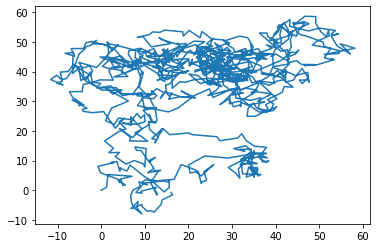

In [3]:
plt.plot(dataDict["x"],dataDict["y"])


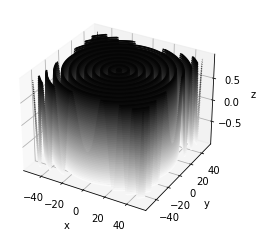

In [4]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

# Data for a three-dimensional line
yline = np.arange(-50,50,0.1)
xline = np.arange(-50,50,0.1)
X,Y = np.meshgrid(xline, yline)
Z = f(X, Y)
dataDict["z"] = Z
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [5]:
global I
global eprev
I = 0; eprev = 0

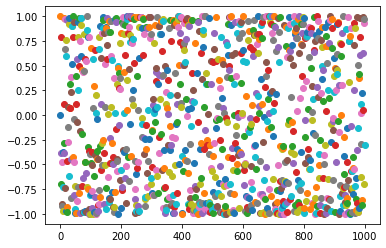

In [10]:
I = 0
eprev = 0
I = 0; eprev = 0
targetValue = 0.25
array = np.arange(-50,50,0.1)
for i in range(len(dataDict["x"])):
    x = round(dataDict["x"][i],1)
    y = round(dataDict["y"][i],1)
    idx = (np.abs(array - (x))).argmin()
    idy = (np.abs(array - (y))).argmin()
    _ = plt.scatter(i,Z[idx][idy])
    feedback,I,eprev = PID(targetValue,Z[idx][idy],0.1,I,eprev)

In [8]:
def PID(target,measurement,dt,I,eprev):
    kp = 20; ki = 5; kd = 2
    e = target - measurement
    if e/target<0.05:
        I = 0
    P = kp*e
    I += ki*e*dt
    D = kd*(e-eprev)/dt
    PID = P + I + D
    if PID < -10:
        PID = 10
    if PID > 10:
        PID = 10
    return PID,I,eprev
    